Spółki giełdowe (NASDAQ):
- AAPL (Apple)
- AAL (American Airlines Group)
- AEP (American Electric Power Company)
- SIRI (Sirius XM Holdings)

Okres:
**23.10.2021 - 23.10.2023**

In [23]:
import pandas as pd
import yfinance as yf
import numpy as np
import glob
import os
from matplotlib.dates import MonthLocator, DateFormatter
import seaborn as sns
import plotly.express as px


In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "MAGISTERKA"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="jpg", resolution=400):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [9]:
stocks = ['AAPL', 'AAL', 'AEP', 'SIRI']

start_data  = '2021-10-23'  # (RRR-MM-DD)
end_data  =  '2023-10-23'   # (RRR-MM-DD)

for stock in stocks:
    data = yf.download(stock, start_data, end_data)
    data['Name'] = stock
    data.to_csv(stock + '.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
# Merge multiple csv files

os.chdir('C:/Users/Karolina/Desktop/MAGISTERKA') # CHANGE ME 
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# Combine all files in the list
price_data = pd.concat([pd.read_csv(f) for f in all_filenames ])
# Export to csv
price_data.to_csv( "price_data.csv", index=False, encoding='utf-8-sig')

In [11]:
# Convert 'Date'

price_data = price_data.set_index('Date')
start, end = '2021-10', '2023-10'

In [26]:
price_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2023-10-16,4.85,4.89,4.74,4.84,4.813600,11469800,SIRI
2023-10-17,4.89,4.90,4.71,4.72,4.694254,8640200,SIRI
2023-10-18,4.72,4.72,4.59,4.60,4.574909,5761400,SIRI
2023-10-19,4.60,4.69,4.54,4.56,4.535127,8771400,SIRI
2023-10-20,4.46,4.56,4.45,4.47,4.445618,8385300,SIRI


In [42]:
import pandas as pd
import plotly.express as px

data = pd.DataFrame()

for stock in stocks:
    stock_data = pd.read_csv(stock + '.csv', parse_dates=['Date'], index_col='Date')
    data[stock] = stock_data['Close']

long_data = data.reset_index().melt(id_vars='Date', var_name='Stock', value_name='Close')

fig = px.line(long_data, x='Date', y='Close', color='Stock', labels={'Close': 'Price'})

fig.update_layout(
    title="Close Price",
    xaxis_title="Date",
    yaxis_title="Price",
    legend_title="Stock",
    showlegend=True,
    height=600,
    width=1000,
)

fig.show()


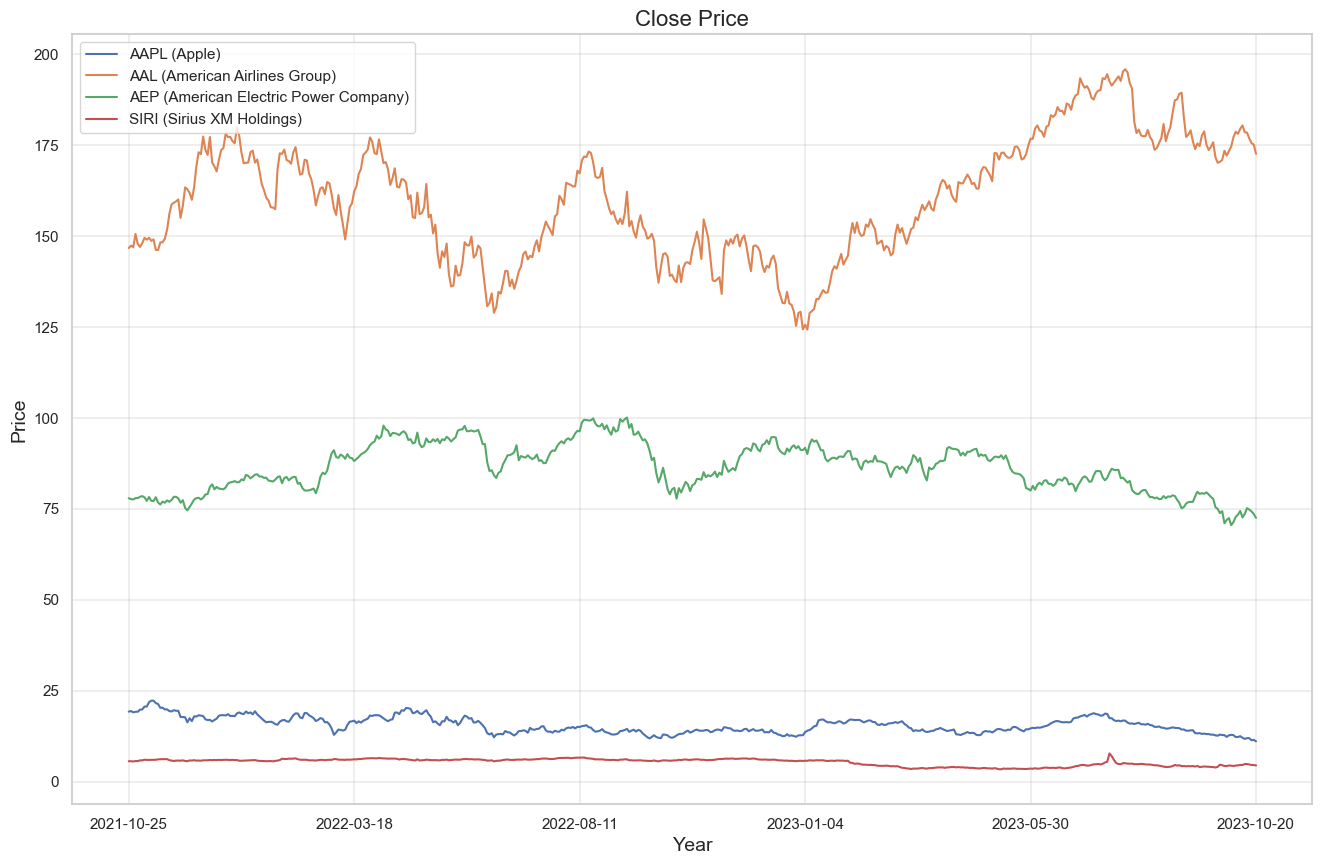

In [43]:
data = pd.DataFrame(columns=stocks)

for stock in stocks:
    data[stock] = pd.read_csv(stock + '.csv')['Close']
    
price_data.groupby('Name')['Adj Close'].plot(figsize=(16, 10))

plt.legend(loc='upper left', labels=['AAPL (Apple)', 'AAL (American Airlines Group)', 'AEP (American Electric Power Company)', 'SIRI (Sirius XM Holdings)'])

plt.title("Close Price", fontsize=16)

plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

plt.grid(which="major", color='k', linestyle='-', linewidth=0.1)

#save_fig("Stocks_2021_2023")
plt.show()

In [44]:
price_data = pd.read_csv('price_data.csv')

In [45]:
price_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Name          object
dtype: object

In [47]:
price_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Name
1999,2023-10-16,4.85,4.89,4.74,4.84,4.813600,11469800,SIRI
2000,2023-10-17,4.89,4.90,4.71,4.72,4.694254,8640200,SIRI
2001,2023-10-18,4.72,4.72,4.59,4.60,4.574909,5761400,SIRI
2002,2023-10-19,4.60,4.69,4.54,4.56,4.535127,8771400,SIRI
2003,2023-10-20,4.46,4.56,4.45,4.47,4.445618,8385300,SIRI


## Return

In [48]:
# Identify rows where the symbol changes
mask = price_data['Name'] != price_data['Name'].shift(1)

# Calculate log return
price_data['Return'] = np.log(price_data['Adj Close']) -  np.log(price_data['Adj Close'].shift(1))

# For rows where symbol changes set null
price_data['Return'] = np.where(mask == True, np.nan, price_data['Return'])

## Gain/lose

In [49]:
# Set '0' if 'Up' is below 0
price_data['Up'] = price_data['Return']
price_data.loc[(price_data['Up']<0), 'Up'] = 0
 
# Set '0' if 'Down' above 0
price_data['Down'] = price_data['Return']
price_data.loc[(price_data['Down']>0), 'Down'] = 0 
 
# Set the absolute value for negative values
price_data['Down'] = abs(price_data['Down'])

## Average gain/loss

In [50]:
# 14-days averages
price_data['avg_14up'] = price_data.groupby('Name')['Up'].transform(lambda x: x.rolling(window=14).mean())
price_data['avg_14down'] = price_data.groupby('Name')['Down'].transform(lambda x: x.rolling(window=14).mean())

## RSI

 $RSI = 100 + \frac{100}{1-RS}$
 
$RS = \frac{Average \ Gain \ Over \ past \ 14 \ days}{Average \ Loss \ Over \ past \ 14 \ days}$

In [51]:
# Calculate RS

price_data['RS_14'] = price_data['avg_14up'] / price_data['avg_14down']

# Calculate RSI

price_data['RSI'] = 100 - (100/(1 + price_data['RS_14']))

## MA

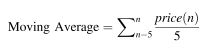

In [52]:
price_data["5MA"] = price_data.groupby('Name')['Adj Close'].transform(lambda x: x.rolling(window = 5).mean())

## Moving Average Convergence Divergence (MACD)

$ MACD = EMA_{12}(C_{t}) - EMA_{26}(C_{t}) $ 

   $ C_{t} = current \ close \ price $

In [53]:
# Calculate 12 and 26 EWM
price_data['12Ewm'] = price_data.groupby('Name')['Adj Close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
price_data['26Ewm'] = price_data.groupby('Name')['Adj Close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())

# Calculate MACD
price_data['MACD'] = price_data['12Ewm'] - price_data['26Ewm']

## Stochastic Oscillator
   $ K = 100 * \frac{C_{t}-L_{14}}{H_{14}-L_{14}} $
    
   $ C_{t} = current \ close \ price $

In [54]:
# Period
n = 14

# Group by the symbol and then take max and min 
price_data['low_14'] = price_data.groupby('Name')['Low'].transform(lambda x: x.rolling(window = n).min())
price_data['high_14'] = price_data.groupby('Name')['High'].transform(lambda x: x.rolling(window = n).max())

# Calculate the stochastic oscillator
price_data['k_percent']  = 100 * ((price_data['Adj Close'] - price_data['low_14']) / (price_data['high_14'] - price_data['low_14']))

In [55]:
price_data

,Date,Open,High,Low,Close,Adj Close,Volume,Name,Return,Up,...,avg_14down,RS_14,RSI,5MA,12Ewm,26Ewm,MACD,low_14,high_14,k_percent
0,2021-10-25,19.160000,19.299999,18.900000,19.230000,19.230000,27977600,AAL,NaN,NaN,...,NaN,NaN,NaN,NaN,19.230000,19.230000,0.000000,NaN,NaN,NaN
1,2021-10-26,19.340000,19.820000,19.240000,19.389999,19.389999,31007900,AAL,0.008286,0.008286,...,NaN,NaN,NaN,NaN,19.254615,19.241851,0.012764,NaN,NaN,NaN
2,2021-10-27,19.450001,19.570000,18.969999,19.030001,19.030001,22215000,AAL,-0.018741,0.000000,...,NaN,NaN,NaN,NaN,19.220059,19.226159,-0.006100,NaN,NaN,NaN
3,2021-10-28,19.110001,19.240000,18.850000,19.190001,19.190001,26506900,AAL,0.008373,0.008373,...,NaN,NaN,NaN,NaN,19.215435,19.223480,-0.008046,NaN,NaN,NaN
4,2021-10-29,19.180000,19.450001,19.010000,19.200001,19.200001,21679000,AAL,0.000521,0.000521,...,NaN,NaN,NaN,19.208000,19.213060,19.221741,-0.008681,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,2023-10-16,4.850000,4.890000,4.740000,4.840000,4.813600,11469800,SIRI,-0.002064,0.000000,...,0.008480,2.862134,74.107581,4.642538,4.510593,4.404801,0.105792,3.81,4.92,90.414414
2000,2023-10-17,4.890000,4.900000,4.710000,4.720000,4.694254,8640200,SIRI,-0.025106,0.000000,...,0.010274,2.030147,66.998301,4.692266,4.538848,4.426242,0.112607,4.00,4.92,75.462428
2001,2023-10-18,4.720000,4.720000,4.590000,4.600000,4.574909,5761400,SIRI,-0.025752,0.000000,...,0.012113,0.898328,47.322074,4.694255,4.544396,4.437254,0.107142,4.20,4.90,53.558464
2002,2023-10-19,4.600000,4.690000,4.540000,4.560000,4.535127,8771400,SIRI,-0.008734,0.000000,...,0.010252,1.061385,51.488925,4.688287,4.542970,4.444504,0.098466,4.20,4.90,47.875317


##  Bollinger Bands

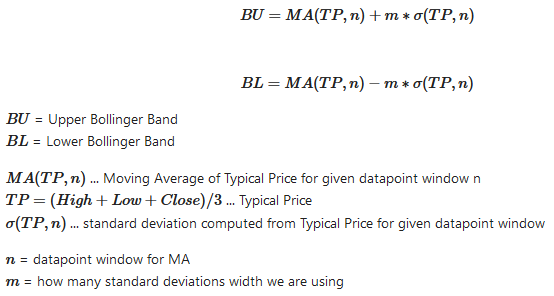

https://tcoil.info/compute-bollinger-bands-for-stocks-with-python-and-pandas/

In [56]:
def bollinger_bands(df, n, m):
    result = df.copy()  
    
    # Initialize new columns with NaN values
    result['B_MA'] = np.nan
    result['BU'] = np.nan
    result['BL'] = np.nan
    
    grouped = df.groupby('Name')
    
    for name, group in grouped:
        data = group['Adj Close']
        
        B_MA = data.rolling(n, min_periods=n).mean()
        sigma = data.rolling(n, min_periods=n).std()
        
        BU = B_MA + m * sigma
        BL = B_MA - m * sigma
        
        # Assign calculated values to the corresponding rows in the result DataFrame
        result.loc[group.index, 'B_MA'] = B_MA
        result.loc[group.index, 'BU'] = BU
        result.loc[group.index, 'BL'] = BL
    
    return result


In [57]:
n = 20   # datapoint rolling window
m = 2    # sigma width
df = bollinger_bands(price_data, 20, 2)

In [58]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,Name,Return,Up,...,5MA,12Ewm,26Ewm,MACD,low_14,high_14,k_percent,B_MA,BU,BL
0,2021-10-25,19.160000,19.299999,18.900000,19.230000,19.230000,27977600,AAL,NaN,NaN,...,NaN,19.230000,19.230000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-26,19.340000,19.820000,19.240000,19.389999,19.389999,31007900,AAL,0.008286,0.008286,...,NaN,19.254615,19.241851,0.012764,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-10-27,19.450001,19.570000,18.969999,19.030001,19.030001,22215000,AAL,-0.018741,0.000000,...,NaN,19.220059,19.226159,-0.006100,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-28,19.110001,19.240000,18.850000,19.190001,19.190001,26506900,AAL,0.008373,0.008373,...,NaN,19.215435,19.223480,-0.008046,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-29,19.180000,19.450001,19.010000,19.200001,19.200001,21679000,AAL,0.000521,0.000521,...,19.208,19.213060,19.221741,-0.008681,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-11-01,19.090000,19.780001,18.870001,19.770000,19.770000,32308500,AAL,0.029255,0.029255,...,19.316,19.298743,19.262353,0.036390,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-11-02,19.670000,19.889999,19.570000,19.830000,19.830000,19979100,AAL,0.003030,0.003030,...,19.404,19.380475,19.304401,0.076074,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-11-03,19.820000,20.670000,19.730000,20.629999,20.629999,35014100,AAL,0.039550,0.039550,...,19.724,19.572710,19.402593,0.170116,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-11-04,20.730000,20.840000,20.350000,20.629999,20.629999,23940500,AAL,0.000000,0.000000,...,20.012,19.735369,19.493512,0.241857,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-11-05,21.910000,22.059999,21.260000,21.820000,21.820000,58082500,AAL,0.056081,0.056081,...,20.536,20.056082,19.665845,0.390237,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
print('Before NaN Drop we have {} rows and {} columns'.format(df.shape[0], df.shape[1]))

# Delete lines with NaN values
df = df.dropna()

# Display how much we have left now
print('After NaN Drop we have {} rows and {} columns'.format(df.shape[0], df.shape[1]))

# price_data.head()

Before NaN Drop we have 2004 rows and 25 columns
After NaN Drop we have 1928 rows and 25 columns


In [60]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Name,Return,Up,...,5MA,12Ewm,26Ewm,MACD,low_14,high_14,k_percent,B_MA,BU,BL
19,2021-11-19,19.139999,19.440001,18.940001,19.280001,19.280001,31259800,AAL,-0.005689,0.000000,...,19.738000,20.153076,20.067555,0.085522,18.940001,22.35,9.970679,20.255500,22.388474,18.122526
20,2021-11-22,19.559999,19.760000,19.049999,19.629999,19.629999,33220600,AAL,0.017991,0.017991,...,19.600000,20.072603,20.035143,0.037460,18.940001,22.35,20.234565,20.275500,22.375229,18.175771
21,2021-11-23,19.750000,20.139999,19.320000,19.469999,19.469999,30427300,AAL,-0.008184,0.000000,...,19.526000,19.979895,19.993281,-0.013386,18.940001,22.35,15.542487,20.279500,22.372420,18.186580
22,2021-11-24,19.330000,19.549999,19.070000,19.459999,19.459999,21323300,AAL,-0.000514,0.000000,...,19.446000,19.899911,19.953778,-0.053868,18.940001,22.35,15.249225,20.301000,22.348210,18.253790
23,2021-11-26,18.270000,18.270000,16.900000,17.750000,17.750000,84177500,AAL,-0.091976,0.000000,...,19.118000,19.569155,19.790535,-0.221380,16.900000,22.35,15.596335,20.229000,22.526696,17.931304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,2023-10-16,4.850000,4.890000,4.740000,4.840000,4.813600,11469800,SIRI,-0.002064,0.000000,...,4.642538,4.510593,4.404801,0.105792,3.810000,4.92,90.414414,4.330748,4.878361,3.783136
2000,2023-10-17,4.890000,4.900000,4.710000,4.720000,4.694254,8640200,SIRI,-0.025106,0.000000,...,4.692266,4.538848,4.426242,0.112607,4.000000,4.92,75.462428,4.357601,4.921800,3.793402
2001,2023-10-18,4.720000,4.720000,4.590000,4.600000,4.574909,5761400,SIRI,-0.025752,0.000000,...,4.694255,4.544396,4.437254,0.107142,4.200000,4.90,53.558464,4.381470,4.939703,3.823237
2002,2023-10-19,4.600000,4.690000,4.540000,4.560000,4.535127,8771400,SIRI,-0.008734,0.000000,...,4.688287,4.542970,4.444504,0.098466,4.200000,4.90,47.875317,4.404345,4.947444,3.861245


### Plot Bollinger Bands

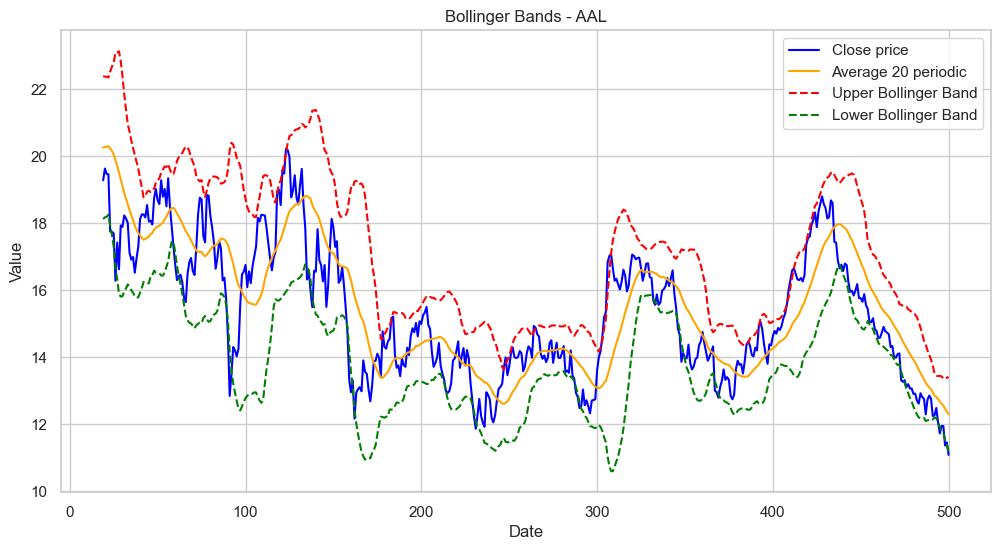

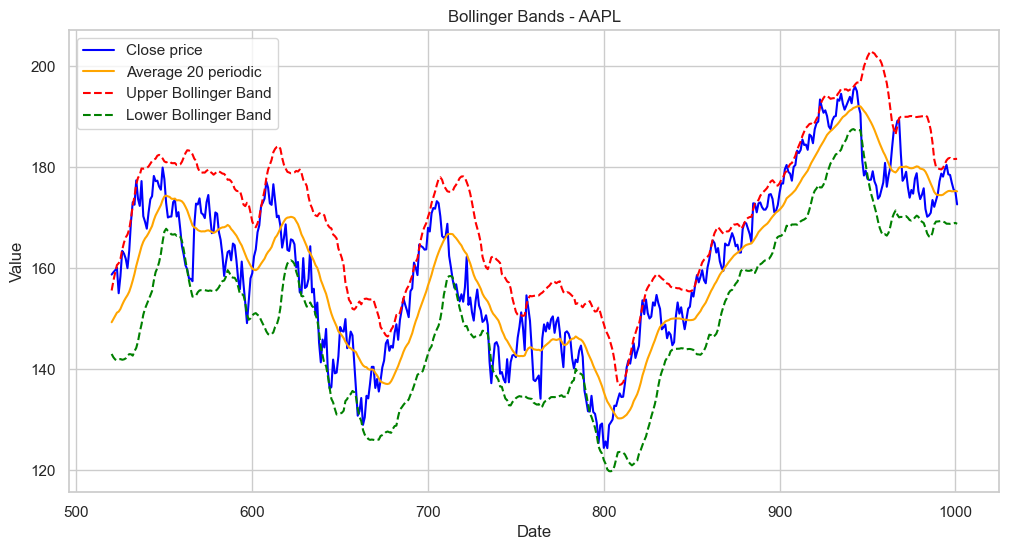

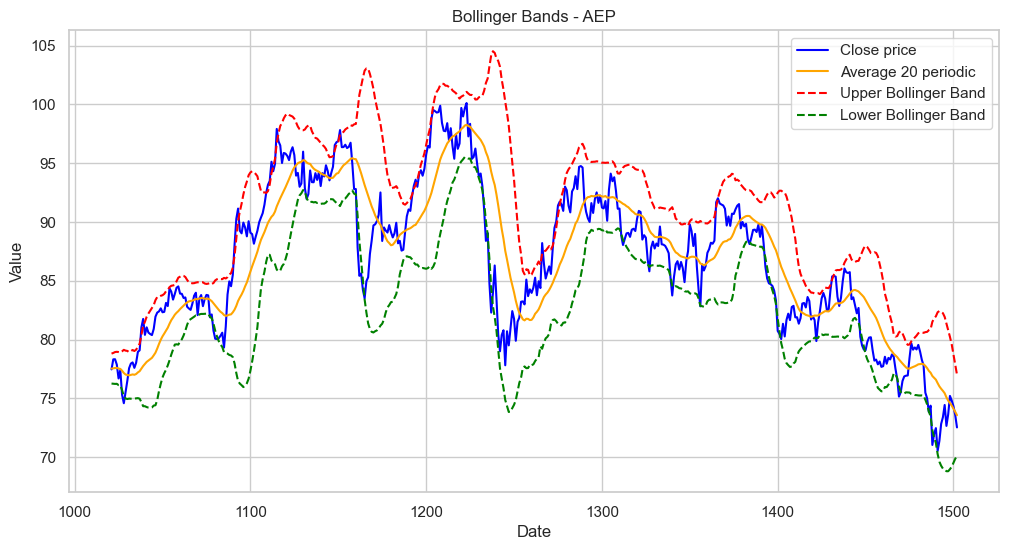

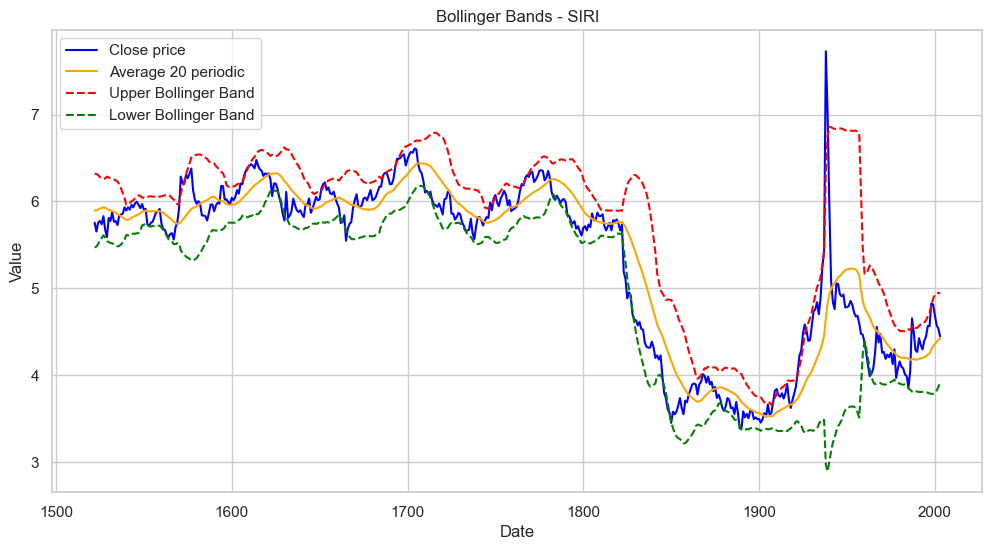

In [61]:
grouped = df.groupby('Name')

for name, group in grouped:
    plt.figure(figsize=(12, 6))
    plt.title(f'Bollinger Bands - {name}')
    
    plt.plot(group.index, group['Adj Close'], label='Close price', color='blue') 
    plt.plot(group.index, group['B_MA'], label=f'Average {n} periodic', color='orange')  
    plt.plot(group.index, group['BU'], label=f'Upper Bollinger Band', color='red', linestyle='--') 
    plt.plot(group.index, group['BL'], label=f'Lower Bollinger Band', color='green', linestyle='--') 
   
    plt.legend()  
    plt.xlabel('Date') 
    plt.ylabel('Value') 
    plt.show()


In [63]:
df.to_csv("indicators_data.csv", index=False, encoding='utf-8-sig')

In [3]:
#df = pd.read_csv('indicators_data.csv')

In [64]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Name,Return,Up,...,5MA,12Ewm,26Ewm,MACD,low_14,high_14,k_percent,B_MA,BU,BL
19,2021-11-19,19.139999,19.440001,18.940001,19.280001,19.280001,31259800,AAL,-0.005689,0.000000,...,19.738000,20.153076,20.067555,0.085522,18.940001,22.350000,9.970679,20.2555,22.388474,18.122526
20,2021-11-22,19.559999,19.760000,19.049999,19.629999,19.629999,33220600,AAL,0.017991,0.017991,...,19.600000,20.072603,20.035143,0.037460,18.940001,22.350000,20.234565,20.2755,22.375229,18.175771
21,2021-11-23,19.750000,20.139999,19.320000,19.469999,19.469999,30427300,AAL,-0.008184,0.000000,...,19.526000,19.979895,19.993281,-0.013386,18.940001,22.350000,15.542487,20.2795,22.372420,18.186580
22,2021-11-24,19.330000,19.549999,19.070000,19.459999,19.459999,21323300,AAL,-0.000514,0.000000,...,19.446000,19.899911,19.953778,-0.053868,18.940001,22.350000,15.249225,20.3010,22.348210,18.253790
23,2021-11-26,18.270000,18.270000,16.900000,17.750000,17.750000,84177500,AAL,-0.091976,0.000000,...,19.118000,19.569155,19.790535,-0.221380,16.900000,22.350000,15.596335,20.2290,22.526696,17.931304
24,2021-11-29,18.150000,18.260000,17.420000,17.740000,17.740000,42940300,AAL,-0.000564,0.000000,...,18.809999,19.287747,19.638644,-0.350897,16.900000,22.330000,15.469615,20.1560,22.673596,17.638404
25,2021-11-30,17.440001,17.740000,16.920000,17.690001,17.690001,49870100,AAL,-0.002822,0.000000,...,18.422000,19.041940,19.494300,-0.452360,16.900000,22.030001,15.399625,20.0520,22.798202,17.305798
26,2021-12-01,17.940001,18.240000,16.260000,16.280001,16.280001,82030100,AAL,-0.083062,0.000000,...,17.784000,18.617026,19.256204,-0.639178,16.260000,21.790001,0.361672,19.8745,23.098466,16.650534
27,2021-12-02,16.490000,17.440001,16.150000,17.420000,17.420000,58808900,AAL,0.067682,0.067682,...,17.376000,18.432868,19.120189,-0.687321,16.150000,21.360001,24.376204,19.7140,23.095369,16.332631
28,2021-12-03,17.270000,17.290001,16.340000,16.620001,16.620001,57884000,AAL,-0.047012,0.000000,...,17.150000,18.153965,18.934990,-0.781024,16.150000,20.570000,10.633512,19.5135,23.133318,15.893682


## Separation of companies

In [65]:
for name, group in df.groupby('Name'):
    group.to_csv(f'AT_{name}.csv', index=False)

# ================

## StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


columns_to_scale = [ 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Return',
 'Up',
 'Down',
 'avg_14up',
 'avg_14down',
 'RS_14',
 'RSI',
 '5MA',
 '12Ewm',
 '26Ewm',
 'MACD',
 'low_14',
 'high_14',
 'k_percent',
 'B_MA',
 'BU',
 'BL']

for name, group in df.groupby('Name'):
    group_scaled = scaler.fit_transform(group[columns_to_scale])
    df.loc[group.index, columns_to_scale] = group_scaled

In [8]:
df.describe().round(decimals = 4)

,Open,High,Low,Close,Adj Close,Volume,Return,Up,Down,avg_14up,...,5MA,12Ewm,26Ewm,MACD,low_14,high_14,k_percent,B_MA,BU,BL
count,5960.0000,5960.0000,5960.0000,5960.0000,5960.0000,5960.0000,5960.0000,5960.0000,5960.0000,5960.0000,...,5960.0000,5960.0000,5960.0000,5960.0000,5960.0000,5960.0000,5960.0000,5960.0000,5960.0000,5960.0000
mean,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,...,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,...,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
min,-3.5457,-3.5133,-3.5087,-3.4844,-3.3047,-1.9341,-8.5796,-0.6214,-0.5618,-2.0534,...,-3.3881,-3.4446,-3.5518,-5.4841,-3.1888,-3.5626,-1.9849,-3.2631,-3.5209,-3.0196
25%,-0.8100,-0.8136,-0.8103,-0.8091,-0.8787,-0.6589,-0.4578,-0.5796,-0.5295,-0.6030,...,-0.8131,-0.8109,-0.8224,-0.4684,-0.8546,-0.8063,-0.8924,-0.8924,-0.8769,-0.8617
50%,0.0444,0.0378,0.0429,0.0416,0.0594,-0.2318,0.0188,-0.5063,-0.5124,-0.2101,...,0.0426,0.0431,0.0649,0.0824,0.0342,0.0451,0.0968,0.0735,0.0514,0.0630
75%,0.6946,0.6913,0.6963,0.6901,0.7325,0.3496,0.4890,0.2520,0.1749,0.3454,...,0.6901,0.6855,0.6889,0.5649,0.7083,0.7001,0.9031,0.7308,0.8107,0.7256
max,2.6173,2.7991,2.5963,2.5969,2.5893,16.0149,9.5310,14.3891,12.6465,7.5822,...,2.5700,2.4365,2.2578,3.0995,2.3416,2.4956,1.7043,2.2912,2.4301,2.3869


In [9]:
price_data.to_csv("norm_data.csv", index=False, encoding='utf-8-sig')

In [10]:
norm_data = pd.read_csv('norm_data.csv')

# Fuzzification

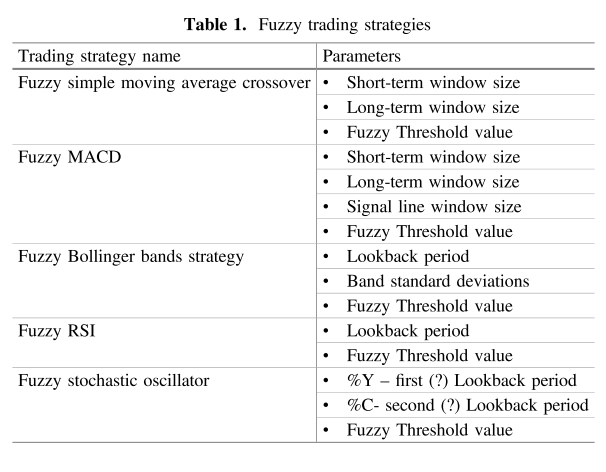

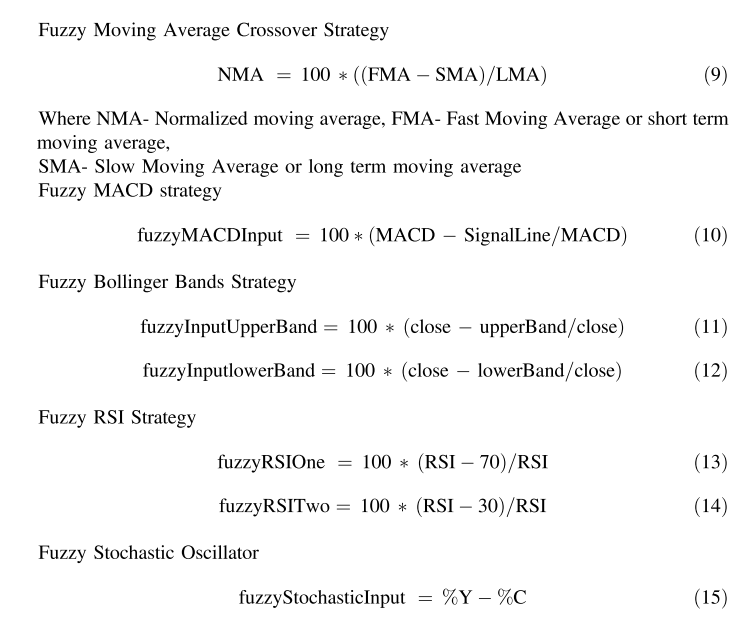

In [75]:
price_data = df.copy()

In [67]:
price_data.columns.tolist()

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Name',
 'Return',
 'Up',
 'Down',
 'avg_14up',
 'avg_14down',
 'RS_14',
 'RSI',
 '5MA',
 '12Ewm',
 '26Ewm',
 'MACD',
 'low_14',
 'high_14',
 'k_percent',
 'B_MA',
 'BU',
 'BL']

## Fuzzy Moving Average Crossover Strategy

### NMA

In [76]:

def calculate_NMA(fast_ma, slow_ma):
    long_ma = max(len(fast_ma), len(slow_ma))
    
    # Check if both lists have the same length
    if len(fast_ma) < long_ma:
        fast_ma = [0] * (long_ma - len(fast_ma)) + fast_ma
    elif len(slow_ma) < long_ma:
        slow_ma = [0] * (long_ma - len(slow_ma)) + slow_ma
    
    nma = [100 * ((f - s) / long_ma) for f, s in zip(fast_ma, slow_ma)]
    
    return nma

In [82]:
grouped_df = price_data.groupby('Name')

for name, group in grouped_df:
    group['NMA'] = calculate_NMA(group['5MA'], group['12Ewm'])



In [85]:
price_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name',
       'Return', 'Up', 'Down', 'avg_14up', 'avg_14down', 'RS_14', 'RSI', '5MA',
       '12Ewm', '26Ewm', 'MACD', 'low_14', 'high_14', 'k_percent', 'B_MA',
       'BU', 'BL'],
      dtype='object')